# Supervised and unsupervised ML problems

ML problems can be categorized in two main groups based on whether
"target" values (also known as labels) are available or not.

Supervised are problems where we have both the input and the desired output
available and we want to discover a model that will allow us to predict new
values from unseen data.

Unsupervised learning problems consist a category where we are only given a
set of data without having any target that we are trying to match.

The commonly used unsupervised algorithms follow to two main categories:
**Clusterization** and **Dimensionality reduction**.

### Clusterization

Clustering is the process of grouping the data based on their features.

The most commonly used methods for clusterization are the following:

- k-means
- Gaussian mixture models
- Hierarchical clustering

### Dimensionality reduction

This problem occurs when we have many features and need to reduce their
number while not loosing a lot of the contained information.

The most common methods for dimensionality reduction are the following:

- Principal Component Analysis (PCA)
- Multidimensional Scaling
- Manifold Learning

The most popular algorithms from these two categories that we will examine
in detail are: **k-means** and **Principal Component Analysis**



# The K-means algorithm

## Input

We are given a collection of **samples** (in their simpler form they are 2-D points but the algorithm can be generalized any number of dimentions). Each **sample** can be expresesed as a tuple **(p1, p2, ... pn)**.

### Input Example

The following list of 2D points can be used as the input to k-means:

```json
[
    (-6.73, 6.5), (-4.43, 7.24), (-4.17, 6.22), (-3.39, 7.73), (-2.93, 6.53), 
    (5.25, -7.29), (6.76, -8.36), (6.95, -6.75), (7.06, -7.12), (7.4, -6.86)
]
```

A graphical representation of this input can be seen here:


<img src="./images/k-means-input-example.png" style="width:320px"/>



## Output

The output consists of the following:

- The centers of each cluster (list of points) (centroids)

- The corresponding centroid for each point.

### Output Example

Following the same data we have seen about as an example, the output of the 
k-means algorithm will consist of the following:

**The coordinates of the centroids**
```json
[
    [ 6.68, -7.27], 
    [-4.33,  6.84]
]
```
and the list of corresponding centroid for each data point:

```json
[0, 0, 0, 1, 1, 1, 1, 0, 1, 0]
```

(where 0 and 1 represent the cetroid)

A graphical representation of this output can be seen here:

<img src="./images/k-means-output-example.png" style="width:320px"/>

Note that the green dots represent the centroids while the colored data points the corresponding clusters.


## Implementation

- Specify an arbitrary number of cluster that you will be looking for.
- Select N random points (N is the number of clusters) called centroids.
- Iterate through all the available points and find the closest centroid.
- Move each centroid to the average point for the assigned points
- Repeat until there are no changes any more.

**Distance calculation**

The implemenatin of the K-means requires to measure the distance of two points; there are several methods to do so and in most of the cases we are using the Euclidean Distance which is given by the following formula for two points:

<img src="./images/euclidean-distance-two-points.png" style="width:420px"/>


It is very simple to generalize the Euclidean Distance formula for two
points with n dimentions as we can see here:


<img src="./images/euclidean-dist-multiple-points.png" style="width:420px"/>

## Pros

- The k-means algorithm is very simple to implement
- It can generalize to clusters of different shapes 

## Cons

- We must pick the number of clusters "by hand"
- Having clusters of significantly different size might generate wrong results
- Sensitive to outliers (we must remove them before training the model)

## Performance

The k-means algorithm can become very slow (NP) as we are increasing the number 
of points and clusters. 

One interesting paper to reduce the complexity of k-means:

https://ieeexplore.ieee.org/document/7065640


In [136]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import seaborn as sns

## Sample data that can be used for clustering

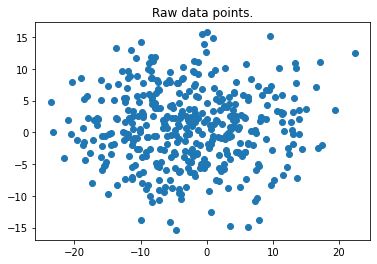

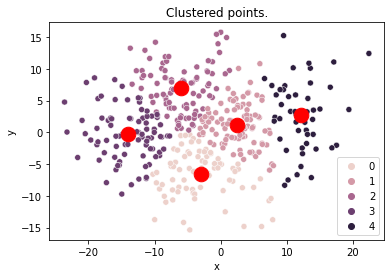

In [137]:
n_clusters = 5

# Create random features to use for testing.
features, _ = make_blobs(
    n_samples = 400,
    n_features = 2, 
    centers = n_clusters,
    cluster_std = 5.8,
    shuffle = True
)

plt.scatter(features[:,0], features[:,1])
plt.title("Raw data points.")
plt.show()

features = pd.DataFrame(features, columns=["x", "y"])

kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(features)
sns.scatterplot(x = features["x"], y = features["y"], hue=kmeans.labels_)

kmeans.cluster_centers_
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=["x", "y"])
_ = plt.scatter(centroids["x"],centroids["y"],color='red', marker="o", s=213)
plt.title("Clustered points.")
_ = plt.show()

# The Elbow Method

As we have seen in the above example when training a k-means model we need
to provide the desired number of clusters as a **hyperparameter** thus we 
have to rely on intuition or trial an error to discover the centroids.

An alternative way that can be used to discover the **optimal** number of
clusters is to use the **Elbow Method**

Before we continue with the **Elbow Method** we need to define the following
new metrics that we use:

- Distortion

   The average of the squared distances from the centroids for all the data
   points.

- Inertia

   The sum of the squared distances from the centroids.


In [138]:
kmeans.inertia_

11060.435267974732

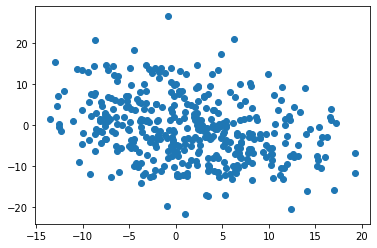

In [139]:
def make_clustered_data(n_clusters, n_samples, cluster_std=3):
    features, _ = make_blobs(
        n_samples = n_samples,
        n_features = 2, 
        centers = n_clusters,
        cluster_std = 5.8,
        shuffle = True
    )

    return pd.DataFrame(features, columns=["x", "y"])

df = make_clustered_data(5, 400)
plt.scatter(df["x"], df["y"])

In [140]:


for n_clusters in range(1, 10):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df)
    print(n_clusters, kmeans.inertia_)
    
    

1 42893.311772733614
2 24147.852767842498
3 17760.406637580087
4 13472.201988808696
5 10830.087418644594
6 9148.7718482045
7 7952.023411151734
8 6971.388675630955
9 6241.384809827611


In [ ]:


for n_clusters in range(1, 10):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df)
    print(n_clusters, kmeans.inertia_)
    
    

In [116]:


for n_clusters in range(1, 10):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df)
    print(n_clusters, kmeans.inertia_)
    
    

1 43921.24833095626
2 25073.776508754338
3 17440.15006189052
4 14267.564003064444
5 11729.03466687978
6 9976.431747715862
7 8577.02274646873
8 7566.456152102596
9 6638.317941786655
